<a href="https://colab.research.google.com/github/saahil-jain/Covid_19_predictor/blob/master/Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
# from google.colab import drive
# drive.mount('/content/gdrive')
! git clone https://github.com/saahil-jain/Covid_19_predictor.git

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cloning into 'Covid_19_predictor'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [4]:
% ls
% cd Covid_19_predictor
% ls

data.csv  GRU-ODE_paper.pdf  NODE_paper.pdf  README.md  Visualisation.ipynb
[Errno 2] No such file or directory: 'Covid_19_predictor'
/content/Covid_19_predictor
data.csv  GRU-ODE_paper.pdf  NODE_paper.pdf  README.md  Visualisation.ipynb


In [5]:
df=pd.read_csv("data.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,22/05/2020,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
1,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
2,20/05/2020,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
3,19/05/2020,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
4,18/05/2020,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia


In [0]:
grouped=df.groupby('countriesAndTerritories')
countries=sorted(list(set(df.countriesAndTerritories.unique())))
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua_and_Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia_and_Herzegovina',
 'Botswana',
 'Brazil',
 'British_Virgin_Islands',
 'Brunei_Darussalam',
 'Bulgaria',
 'Burkina_Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape_Verde',
 'Cases_on_an_international_conveyance_Japan',
 'Cayman_Islands',
 'Central_African_Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa_Rica',
 'Cote_dIvoire',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Democratic_Republic_of_the_Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican_Republic',
 'Ecuador',
 'Egypt',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fa

In [0]:
country_wise_cases=dict()
country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]


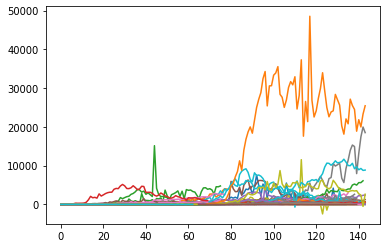

In [0]:
for country in countries:
  graph=plt.plot(country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()

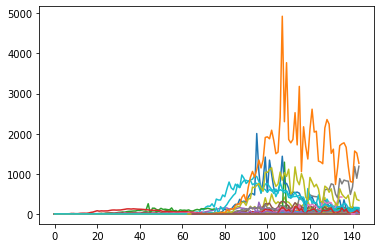

In [0]:
for country in countries:
  graph=plt.plot(country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

In [0]:
cummulative_country_wise_cases=dict()
cummulative_country_wise_deaths=dict()

for country in countries:
  cummulative_country_wise_cases[country] = []
  cummulative_country_wise_deaths[country] = []
  cummulative_cases = 0
  cummulative_death = 0
  total_days = len(country_wise_deaths[country])
  for index in range(total_days):
    cummulative_cases += country_wise_cases[country][index]
    cummulative_death += country_wise_deaths[country][index]
    cummulative_country_wise_cases[country].append(cummulative_cases)
    cummulative_country_wise_deaths[country].append(cummulative_death)

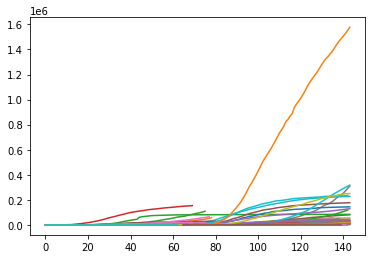

In [0]:
for country in countries:
  graph=plt.plot(cummulative_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()

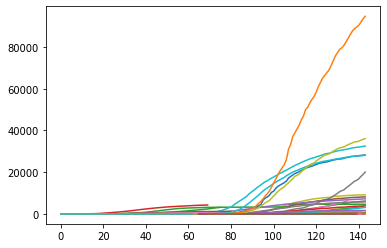

In [0]:
for country in countries:
  graph=plt.plot(cummulative_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

In [0]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cummulative_country_wise_cases[country][-1]),"{0:10d}".format(cummulative_country_wise_deaths[country][-1]))
plt.show()

Afghanistan                                         8676        193
Albania                                              969         31
Algeria                                             7728        575
Andorra                                              762         51
Angola                                                58          3
Anguilla                                               3          0
Antigua_and_Barbuda                                   25          3
Argentina                                           9918        416
Armenia                                             5606         70
Aruba                                                101          3
Australia                                           7081        100
Austria                                            16332        633
Azerbaijan                                          3749         44
Bahamas                                               97         11
Bahrain                                         

In [0]:
#code to generate a list of top 15 countries with highest cummulative deaths and cases.
#generates two lists of countries which are sorted in descending order based on the cases/deaths
#adjust value of slicing to get top 10/20.
countries_and_cases=[]
countries_and_deaths=[]

for country,cumm_cases in zip(cummulative_country_wise_cases.keys(),cummulative_country_wise_cases.values()):
  countries_and_cases.append([country,cumm_cases[-1]])
countries_and_cases=sorted(countries_and_cases,key=lambda x:x[1],reverse=True)
top_15_cases=list(map(lambda x:x[0],countries_and_cases))[:15]


for country,cumm_deaths in zip(cummulative_country_wise_deaths.keys(),cummulative_country_wise_deaths.values()):
  countries_and_deaths.append([country,cumm_deaths[-1]])
countries_and_deaths=sorted(countries_and_deaths,key=lambda x:x[1],reverse=True)

top_15_deaths=list(map(lambda x:x[0],countries_and_deaths))[:15]
top_15_cases

['United_States_of_America',
 'Russia',
 'Brazil',
 'United_Kingdom',
 'Spain',
 'Italy',
 'Germany',
 'Turkey',
 'France',
 'Iran',
 'India',
 'Peru',
 'China',
 'Canada',
 'Saudi_Arabia']